The proximal operator of PiE $f_{\sigma}$ by Theorem 2.8 when $\frac{\mu\lambda}{\sigma^2}\!<\!1$; 

and by Theorem 2.9 or Theorem 2.13 or Theorem 2.15 when $\frac{\mu\lambda}{\sigma^2}\!\geq\!1$.

Reference: Yulan Liu, Yuyang Zhou, and Rongrong Lin, The Proximal Operator of the Piece-wise Exponential Function

In [1]:
import math
from scipy.special import lambertw
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
def shrinkage_PiE_soft(sigma,mu,Lambda,x0):#temp<=1
    x = np.zeros((np.shape(x0)[0],1))
    index = abs(x0)>mu*Lambda/sigma
    
    z = -(mu*Lambda/sigma**2)*np.exp(-abs(x0[index])/sigma)
    x1 = sigma*lambertw(z,0).real+abs(x0[index])
    x[index] = np.sign(x0[index])*x1
    return x

M. Malek-Mohammadi, A. Koochakzadeh, M. Babaie-Zadeh, M. Jansson, and C. R.
Rojas. Successive concave sparsity approximation for compressed sensing. IEEE
Transactions on Signal Processing, 64(21):5657–5671, 2016

\begin{align}\label{ErrorFormula}
   \mathcal{T}_{\mu\lambda}^{(\sigma)}(x_0)=\left\{\begin{array}{cl}
    \{0\}, & \quad| x_{0}  | < \sigma (1+\ln( \frac{\mu \lambda}{\sigma ^{2}})),   \\ 
    \{0\}, & \quad\widehat{L}(x_{1},x_{0})>\widehat{L}(0,x_{0}), \\
     \{0,x_1\}, & \quad\widehat{L}(x_{1},x_{0})=\widehat{L}(0,x_{0}), \\
    \{x_1\}, &\quad {\rm otherwise},
    \end{array}\right.
   \end{align}
where the loss $\widehat{L}(\cdot,x_0)$ defined as 
$$
   \hat{L}(x,x_0)=\left\{\begin{array}{ll}
   \frac{x_0^2}{2\mu},& x=0, \\
   \lambda +\frac{\sigma^2}{\mu}(\frac12 W_0^2(z)+W_0(z)),   & x=x_1,
   \end{array}\right.
 $$
 with $x_1:=\sigma W_0(z)+|x_0|$ and $z:=-\frac{\mu\lambda}{\sigma^2}e^{-\frac{|x_0|}{\sigma}}$.

In [3]:
def shrinkage_PiE_2016(sigma,mu,Lambda,x):#temp>1的情况
    n = np.shape(x)[0]
    y = np.zeros((n,1))
    threshold1 = sigma*(1+np.log(mu*Lambda/sigma**2))
    threshold2= np.min([mu*Lambda/sigma,np.sqrt(2*mu*Lambda)])
    index0 = abs(x)<=threshold1
    index1 = np.logical_and(abs(x)>threshold1,abs(x)<=threshold2)
    index2 = abs(x)>threshold2
    index12 = abs(x)>threshold1
    
    x0 = x.copy()
    z = np.zeros((n,1))
    lamb = np.zeros((n,1))
    Loss = np.zeros((n,1))#L(x1，x0)-L(0,x0)
    
    z[index12] = -(mu*Lambda/sigma**2)*np.exp(-abs(x0[index12])/sigma)
    
    lamb[index12] = lambertw(z[index12],0).real
    Loss[index12] = Lambda + (sigma**2/mu)*( (lamb[index12])**2/2+lamb[index12])-x0[index12]**2/(2*mu)#L(x1，x0)-L(0,x0)
    
    index_negative=Loss<0#L(x1，x0)-L(0,x0)<0,取x1
    
    y[index2] = np.sign(x0[index2])*(sigma*lamb[index2]+abs(x0[index2]))

    y[index_negative] = np.sign(x0[index_negative])*(sigma*lamb[index_negative]+abs(x0[index_negative]))

    return y

Let $\frac{\mu\lambda}{\sigma^2}>1$ and $x_0\in {\mathbb R}$. Then
\begin{align}\label{RefineProx}
\mathcal{T}_{\mu\lambda}^{(\sigma)}(x_0)=\left\{\begin{array}{ll}
\{0\}, & |x_0|< \sigma(1+\ln \frac{\mu\lambda}{\sigma^2}),\\
\arg\min\limits_{x=0,x_1}\{\widehat{L}(x,x_0)\},&  \sigma(1+\ln \frac{\mu\lambda}{\sigma^2})\leq |x_0|\le \min\{\frac{\mu\lambda}{\sigma},\sqrt{2\mu\lambda}\},\\
x_1,& |x_0|>\min\{\frac{\mu\lambda}{\sigma},\sqrt{2\mu\lambda}\},
\end{array}
\right.
\end{align}
where   $x_1:=\sigma W_0(-\frac{\mu\lambda}{\sigma^2}e^{-\frac{|x_0|}{\sigma}})+|x_0|$.

In [4]:
def shrinkage_PiE_hard(sigma,mu,Lambda,x):#temp>1的情况
    n = np.shape(x)[0]
    y = np.zeros((n,1))
    threshold1 = sigma*(1+np.log(mu*Lambda/sigma**2))
    threshold2= np.min([mu*Lambda/sigma,np.sqrt(2*mu*Lambda)])
    index0 = abs(x)<=threshold1
    index1 = np.logical_and(abs(x)>threshold1,abs(x)<=threshold2)
    index2 = abs(x)>threshold2
    index12 = abs(x)>threshold1
    
    x0 = x.copy()
    z = np.zeros((n,1))
    lamb = np.zeros((n,1))
    Loss = np.zeros((n,1))#L(x1，x0)-L(0,x0)
    
    z[index12] = -(mu*Lambda/sigma**2)*np.exp(-abs(x0[index12])/sigma)
    
    lamb[index12] = lambertw(z[index12],0).real

    Loss[index1] = Lambda + (sigma**2/mu)*( (lamb[index1])**2/2+lamb[index1])-x0[index1]**2/(2*mu)#L(x1，x0)-L(0,x0)
    
    index_negative=Loss<0#L(x1，x0)-L(0,x0)<0,取x1
    
    y[index2] = np.sign(x0[index2])*(sigma*lamb[index2]+abs(x0[index2]))

    y[index_negative] = np.sign(x0[index_negative])*(sigma*lamb[index_negative]+abs(x0[index_negative]))
    
    index_N = y*np.sign(x)<0#小于0的赋为0
    y[index_N] = 0
    
    return y

 Let $\frac{\mu\lambda}{\sigma^2}>1$ and $x_0\in {\mathbb R}$. Then
$$
\mathcal{T}_{\mu\lambda}^{(\sigma)}(x_0)=\left\{\begin{array}{ll}
\{0\}, & |x_0|< \bar{\tau}_{\mu\lambda,\sigma},\\
\{0,x_1\},& |x_0|=\bar{\tau}_{\mu\lambda,\sigma},\\
\{x_1\},& \mbox{otherwise},
\end{array}
\right.
$$
where the threshold $\bar{\tau}_{\mu\lambda,\sigma}=x^*+\frac{\mu\lambda}{\sigma} e^{-\frac{ x^*}{\sigma}}$, $x^*\in(0,\sqrt{2\mu\lambda})$ is the solution of the equation 
$$
H'(x)=\frac12+\mu\lambda\frac{(\frac{x}{\sigma}+1) e^{-\frac{x}{\sigma}}-1}{x^2}=0, x\in (0,\infty)
$$
and $x_1:=\sigma W_0(-\frac{\mu\lambda}{\sigma^2}e^{-\frac{|x_0|}{\sigma}})+|x_0|$.

In [3]:
def J(z,mu,Lambda,sigma):
    return 0.5+mu*Lambda*((z/sigma +1)*np.exp(-z/sigma)-1)/(z**2)

def bisection_PiE(a,b,mu,Lambda,sigma):
    for i in range(30):
        c=(a+b)/2
        if (J(a,mu,Lambda,sigma)*J(c,mu,Lambda,sigma))<0.00:
            b=c
        else:
            a=c
        if (b-a)<1e-8:
            break 
    return c

def PiEProximalbyLambertWThreshold(sigma,mu,Lambda,x):
    n = np.shape(x)[0]
    y = np.zeros((n,1))
    xstar = bisection_PiE(1e-6,np.sqrt(2*mu*Lambda),mu,Lambda,sigma)
    Threshold=xstar+mu*Lambda*np.exp(-xstar/sigma)
    
    index = abs(x)>Threshold
    
    z = -(mu*Lambda/sigma**2)*np.exp(-abs(x[index])/sigma)
    
    lamb = lambertw(z,0).real
    
    y[index] = np.sign(x[index])*(sigma*lamb+abs(x[index]))
    
    return y

PiE Proximal Operator by Lambert W Threshold

In [4]:
def recurrence_PiE(a,b,mu,Lambda,sigma):
    c=(a+b)/2
    if abs(J(a,mu,Lambda,sigma)-J(c,mu,Lambda,sigma))<1e-6:
        return c
    elif (J(a,mu,Lambda,sigma)*J(c,mu,Lambda,sigma))<0:
        return recurrence_PiE(a,c,mu,Lambda,sigma)
    else:
        return recurrence_PiE(c,b,mu,Lambda,sigma)

def PiEProximalbyLambertWThresholdRecurrence(sigma,mu,Lambda,x):
    n = np.shape(x)[0]
    y = np.zeros((n,1))
    xstar = recurrence_PiE(1e-6,np.sqrt(2*mu*Lambda),mu,Lambda,sigma)
    Threshold=xstar+mu*Lambda*np.exp(-xstar/sigma)
    
    index = abs(x)>Threshold
    
    z = -(mu*Lambda/sigma**2)*np.exp(-abs(x[index])/sigma)
    
    lamb = lambertw(z,0).real
    
    y[index] = np.sign(x[index])*(sigma*lamb+abs(x[index]))
    
    return y

$T^{(\sigma)}_{\sigma}$

<function matplotlib.pyplot.show(close=None, block=None)>

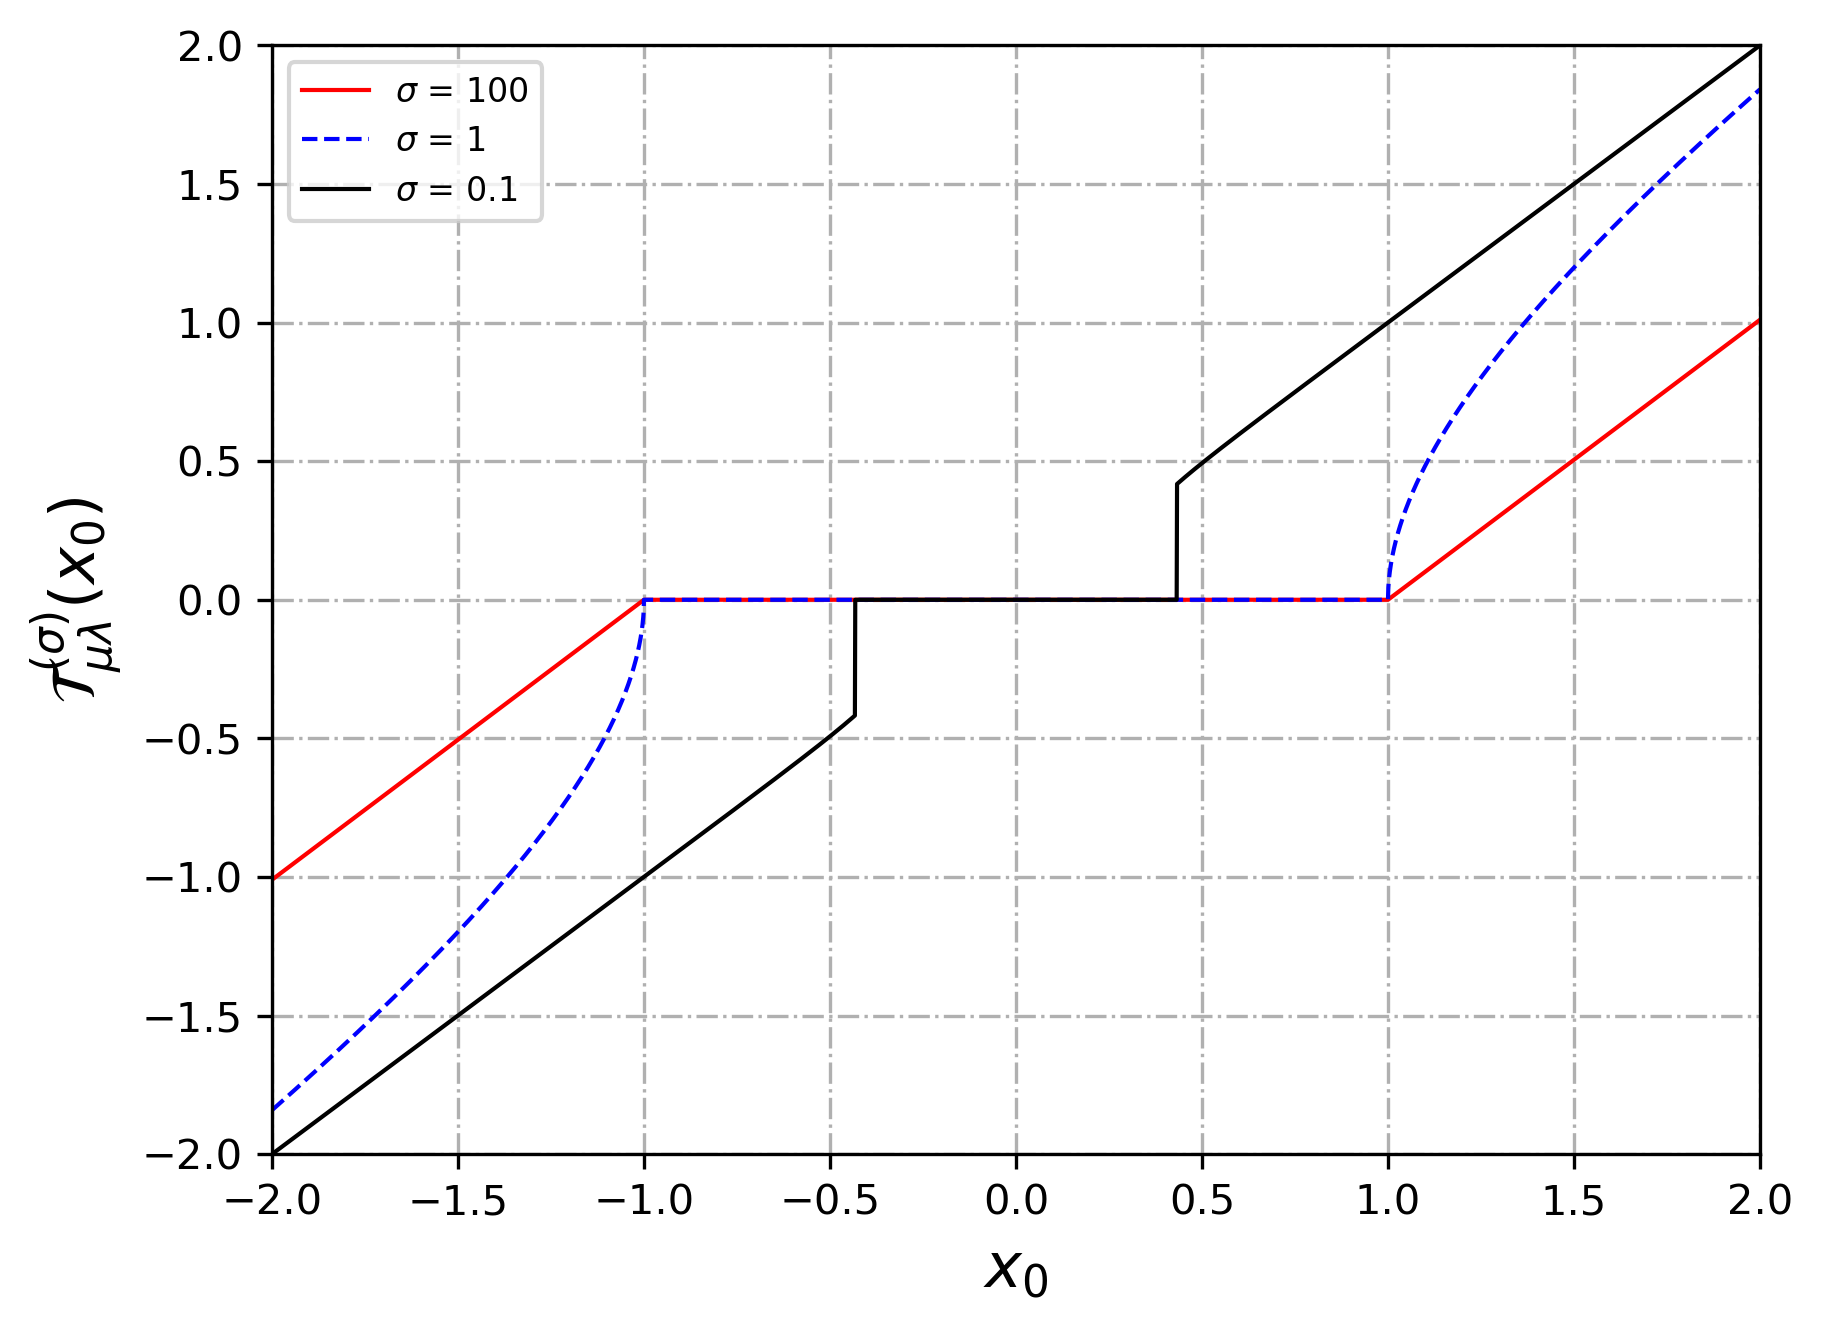

In [6]:
sigma = [100,1,0.1]
plt.rcParams['figure.dpi'] = 300 #分辨率
plt.figure()
plt.grid(linestyle='-.')
colors = ['r-','b--','k-']
label = [r'$\sigma$ = 100',r'$\sigma$ = 1',r'$\sigma$ = 0.1']
p = 0
x = np.linspace(-2,2,4001).reshape((-1,1))
n=np.shape(x)[0]
y = np.zeros((n,1)) 

mu = 1
for i in sigma:
    Lambda = i
    temp = mu*Lambda/i**2
    if temp<=1:
        y = shrinkage_PiE_soft(i,mu,Lambda,x)
    else:
        y = PiEProximalbyLambertWThreshold(i,mu,Lambda,x)
    plt.plot(x,y,colors[p],label = label[p], linewidth=1)
    p =p+1
plt.xlabel(r'$x_0$',fontsize=15)
plt.ylabel(r'$\mathcal{T}_{\mu\lambda}^{(\sigma)}(x_0)$',fontsize=15)
plt.xlim((-2,2))
plt.ylim((-2,2))
plt.legend(fontsize = 8)
plt.savefig('true image.png', bbox_inches = 'tight',dpi=600)
plt.show

Let $\mu\lambda=1$. The proximal operator $T_1^{(\sigma)}$ with $\sigma \in \{1/5,1/3,1/2,1,2,10\}$

<function matplotlib.pyplot.show(close=None, block=None)>

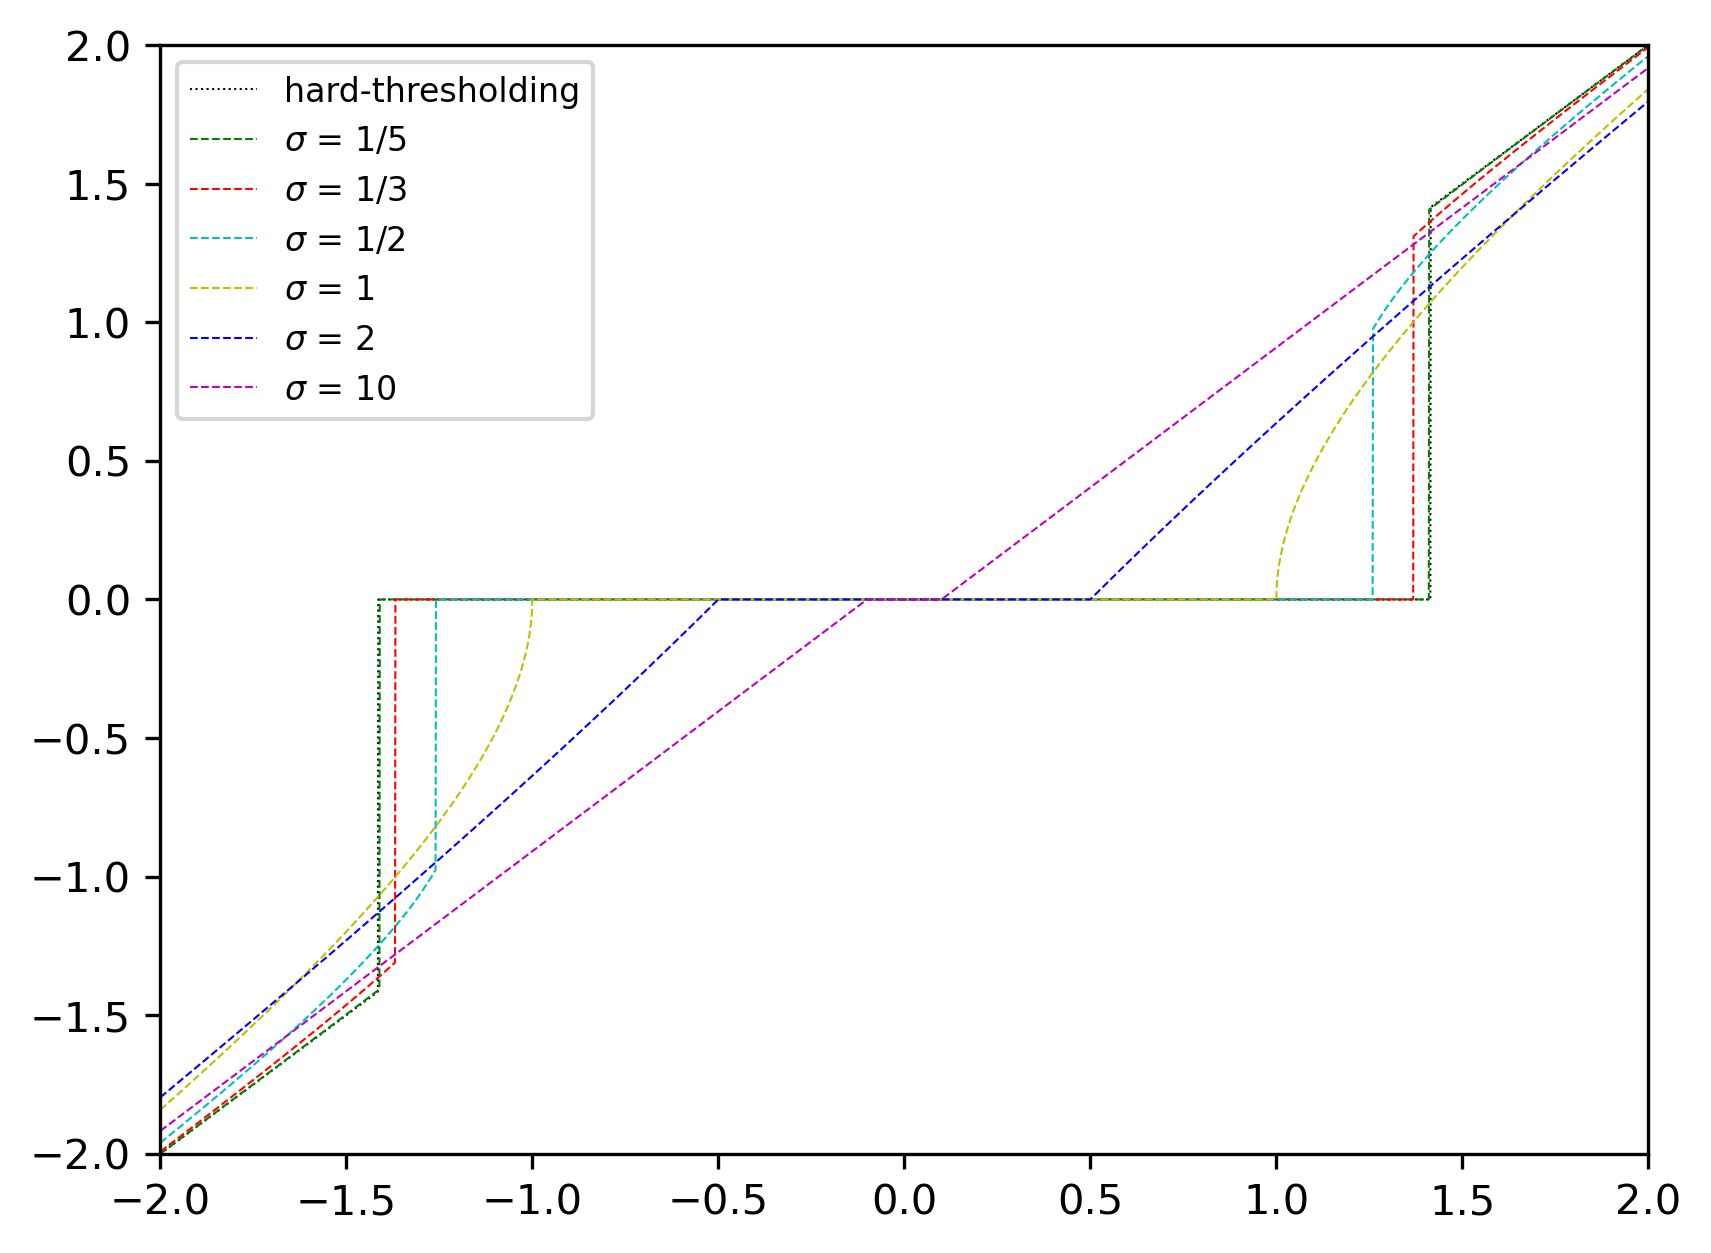

In [7]:
plt.rcParams['figure.dpi'] = 300 #分辨率
plt.figure()
#plt.grid(linestyle='-.')
sigma = [1/5,1/3,1/2,1,2,10]
colors = ['g--','r--','c--','y--','b--','m--']
label = [r'$\sigma$ = 1/5',r'$\sigma$ = 1/3',r'$\sigma$ = 1/2',r'$\sigma$ = 1',r'$\sigma$ = 2',r'$\sigma$ = 10']
p = 0
x = np.linspace(-2,2,4001).reshape((-1,1))
n=np.shape(x)[0]
y = np.zeros((n,1)) 

#Hard Thresholding
for i in range(n):
    if abs(x[i])<= np.sqrt(2):
        y[i] = 0
    else:
        y[i] = x[i]
plt.plot(x,y,'k:',label = 'hard-thresholding', linewidth=0.5)


mu = 1
Lambda =1 
for i in sigma:
    temp = mu*Lambda/i**2
    if temp<=1:
        y = shrinkage_PiE_soft(i,mu,Lambda,x)
    else:
        y = PiEProximalbyLambertWThreshold(i,mu,Lambda,x)
    plt.plot(x,y,colors[p],label = label[p], linewidth=0.5)
    p =p+1
plt.xlim((-2,2))
plt.ylim((-2,2))
plt.legend(fontsize = 8)
plt.savefig('PiEProximalbyLambertW.png', bbox_inches = 'tight',dpi=600)
plt.show

time comparison

In [8]:
x= np.linspace(0,10,1000000).reshape((-1,1))
t2 = time.process_time()
y2 = shrinkage_PiE_2016(0.2,1,1,x)
print(time.process_time() - t2)
# plt.plot(x,y2)
# plt.show

0.15625


In [9]:
x= np.linspace(0,10,1000000).reshape((-1,1))
t3 = time.process_time()
y3 = shrinkage_PiE_hard(0.2,1,1,x)#
print(time.process_time() - t3)
# plt.plot(x,y3)
# plt.show

0.140625


In [7]:
x= np.linspace(0,10,100000000).reshape((-1,1))
t5 = time.process_time()
y5 = PiEProximalbyLambertWThreshold(0.2,1,1,x)#(sigma,mu,Lambda,x)
print(time.process_time() - t5)
# plt.plot(x,y4)
# plt.show

9.109375


In [8]:
x= np.linspace(0,10,100000000).reshape((-1,1))
t4 = time.process_time()
y4 = PiEProximalbyLambertWThresholdRecurrence(0.2,1,1,x)#(sigma,mu,Lambda,x)
print(time.process_time() - t4)
# plt.plot(x,y4)
# plt.show

9.0
